In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
#пока скопирую из excel только для Листа 1 таблицы данных Nonlin_ker_1.xlsx
df = pd.read_excel(r'C:\Users\Андрей\Desktop\5 сем\Artificial_intelligence\not_binary_classification\Nonlin_ker_1.xlsx', header=None, names= ['x','y','mark'])
# df.rename(columns={"0": "x", "1": "y","2":"m"})


,x,y,mark
0,1.317551,0.864138,1
1,-0.155116,1.399108,-1
2,1.875347,1.553792,1
3,2.292951,1.997808,1
4,0.855679,1.960434,1
...,...,...,...
145,0.456555,2.566107,-1
146,0.504469,1.206999,-1
147,1.571923,0.516791,-1
148,1.925903,0.447258,-1


<Axes: xlabel='x', ylabel='y'>

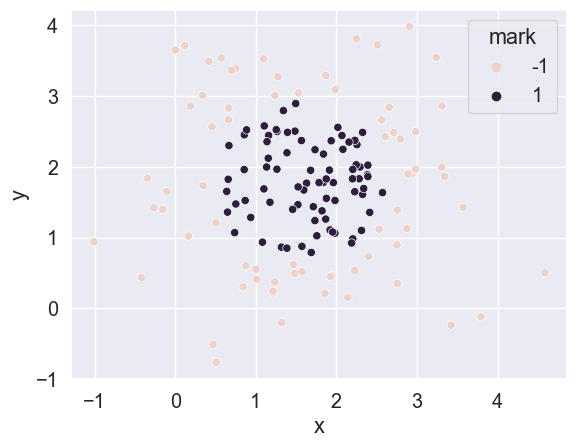

In [3]:
sns.scatterplot(data=df, x="x", y="y", hue = "mark")

In [4]:
# 1) Построение бинарного классификатора SVM с нелинейными ядрами
#делим на выборки - обучающие и тестовые
from sklearn.model_selection import train_test_split
X = df[['x','y']].to_numpy()
y = df[['mark']].to_numpy()

#X – признаковое пространство,
#y – целевая переменная (метка класса), 
#test_size – размер обучающей выборки (можно указывать как в процентах, так и в долях),
#random_state – параметр разделения. Если указать значение типа Integer, то при каждом запуске значения тестовой и обучающей выборки будут детерминированными. Если ничего не указать, то каждый раз будут генерироваться случайные выборки. 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test


(array([[ 6.59102362e-01,  2.66356470e+00],
        [ 2.98213240e+00,  1.96815776e+00],
        [ 2.90777947e+00,  3.98327509e+00],
        [ 2.38983917e+00,  1.86125103e+00],
        [ 5.09702250e-01, -7.65491428e-01],
        [-1.00802483e+00,  9.40568485e-01],
        [ 3.79383555e+00, -1.19413887e-01],
        [ 6.66739502e-01,  2.29992335e+00],
        [ 1.31755105e+00,  8.64137988e-01],
        [ 3.34301504e+00,  1.86461494e+00],
        [ 1.17535924e+00,  1.49876200e+00],
        [-3.45011210e-01,  1.83711591e+00],
        [ 1.89370818e-01,  2.85723334e+00],
        [ 1.73301943e+00,  1.23956869e+00],
        [ 1.21541731e+00,  2.16616393e-01],
        [ 1.98260299e+00,  3.08738304e+00],
        [ 1.32186210e+00, -2.02334960e-01],
        [ 2.22825624e+00,  2.37300001e+00],
        [ 1.23573897e+00,  3.00824786e+00],
        [ 1.67966481e+00,  1.95010631e+00],
        [ 3.57434863e+00,  1.42647811e+00],
        [ 1.19483893e-01,  3.71426072e+00],
        [ 1.71311998e+00,  1.435

In [5]:
# np.c_[np.array([1,2,3]), np.array([4,5,6])]
np.c_[XX.ravel(), YY.ravel()], XX.ravel(), YY.ravel()[:200]
#это он так создает сетку.
help(clf.decision_function)
# Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
# Z
# Put the result into a color plot
Z = Z.reshape(XX.shape)
#в pcolormesh как раз таки и используется наша сетка XX*YY, (первые две координаты дают прямоугольники в которых цвет заполняется
#далее "Z>0" это булевский массив где каждая ячейка говорит каким цветом (True или False) заполнить этот прямоугольник - то есть красим каждый прямоугольник согласно
#решающей функции для левой нижней точки этого прямоугольника, затем cmap устанавливаем палитру цветов)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
Z>0

NameError: name 'XX' is not defined

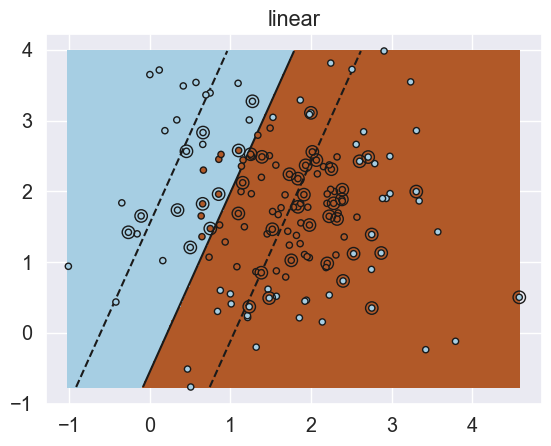

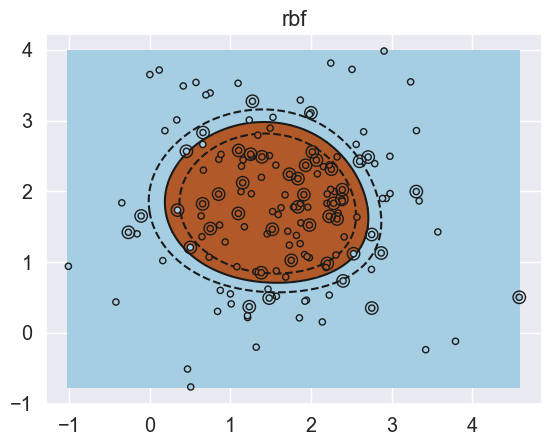

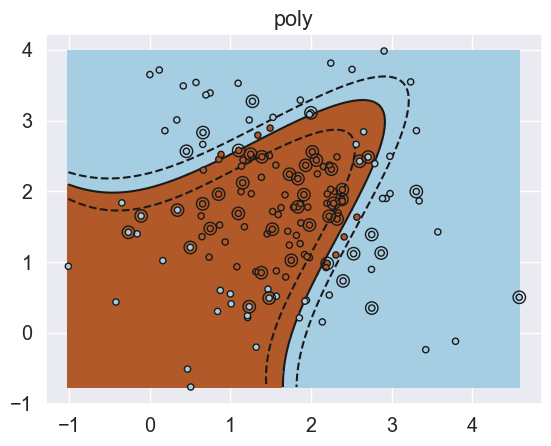

In [6]:
# 1) Построение бинарного классификатора SVM с нелинейными ядрами
#делим на выборки - обучающие и тестовые
#тут указано как делать
# https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py
from sklearn.model_selection import train_test_split
from sklearn import svm

X = df[['x','y']].to_numpy()
y = df[['mark']].to_numpy()

#X – признаковое пространство,
#y – целевая переменная (метка класса), 
#test_size – размер обучающей выборки (можно указывать как в процентах, так и в долях),
#random_state – параметр разделения. Если указать значение типа Integer, то при каждом запуске значения тестовой и обучающей выборки будут детерминированными. Если ничего не указать, то каждый раз будут генерироваться случайные выборки. 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma='scale')
#     clf = svm.SVC(kernel="linear", gamma=10)
    clf.fit(X_train, y_train)
    plt.figure()
    plt.clf()
    plt.scatter(
            X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
        )
    plt.axis("tight")
    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    # print(x_min,x_max,y_min,y_max)
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    #рисуем контурные линии соответствующие уровням решающей функции (decision_function) - уровень decision_function = 0; =+-0.5
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
    
plt.show()



In [7]:
#выведем gama в полиномиальном и rbf ядре, X.var() - дисперсия выборки (причем всей, а не train), 2 - это n_features (количество признаков)
gamma = 1/X_train.var()/2
print("Poly and rbf gamma:\t", gamma)
clf.gamma

Poly and rbf gamma:	 0.4975603240355808


'scale'

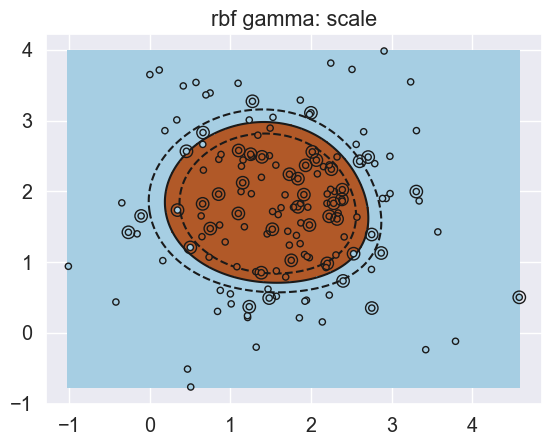

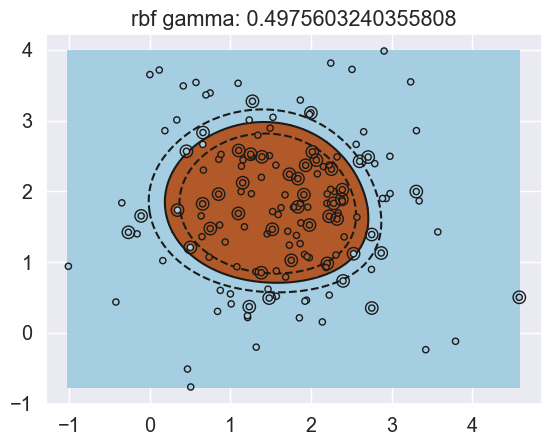

In [8]:

kernel = "rbf"
gamma_2d_range = ['scale',gamma]
for gamma in gamma_2d_range:
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    #     clf = svm.SVC(kernel="linear", gamma=10)
    clf.fit(X_train, y_train)
    plt.figure()
    plt.clf()
    plt.scatter(
            X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
        )
    plt.axis("tight")
    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    # print(x_min,x_max,y_min,y_max)
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    #рисуем контурные линии соответствующие уровням решающей функции (decision_function) - уровень decision_function = 0; =+-0.5
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel + " gamma: " + str(gamma))
    
plt.show()



0.1
1.0002352850434597 0.873636329087601
For C==0.01 there all of predicts is to 1 class
indexes where -1 (array([], dtype=int64), array([], dtype=int64))
indexes where 1 (array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([  0,   1,   2, ..., 197, 198, 199], dtype=int64))
scale
1.000906832602051 0.6761974204143594
For C==0.01 there all of predicts is to 1 class
indexes where -1 (array([], dtype=int64), array([], dtype=int64))
indexes where 1 (array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([  0,   1,   2, ..., 197, 198, 199], dtype=int64))
1
1.001613316777307 0.6674376004134678
For C==0.01 there all of predicts is to 1 class
indexes where -1 (array([], dtype=int64), array([], dtype=int64))
indexes where 1 (array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([  0,   1,   2, ..., 197, 198, 199], dtype=int64))
10.0
1.002856587389159 0.894824178562579
For C==0.01 there all of predicts is to 1 class
indexes where -1 (array([], dtype=int64), array([], d

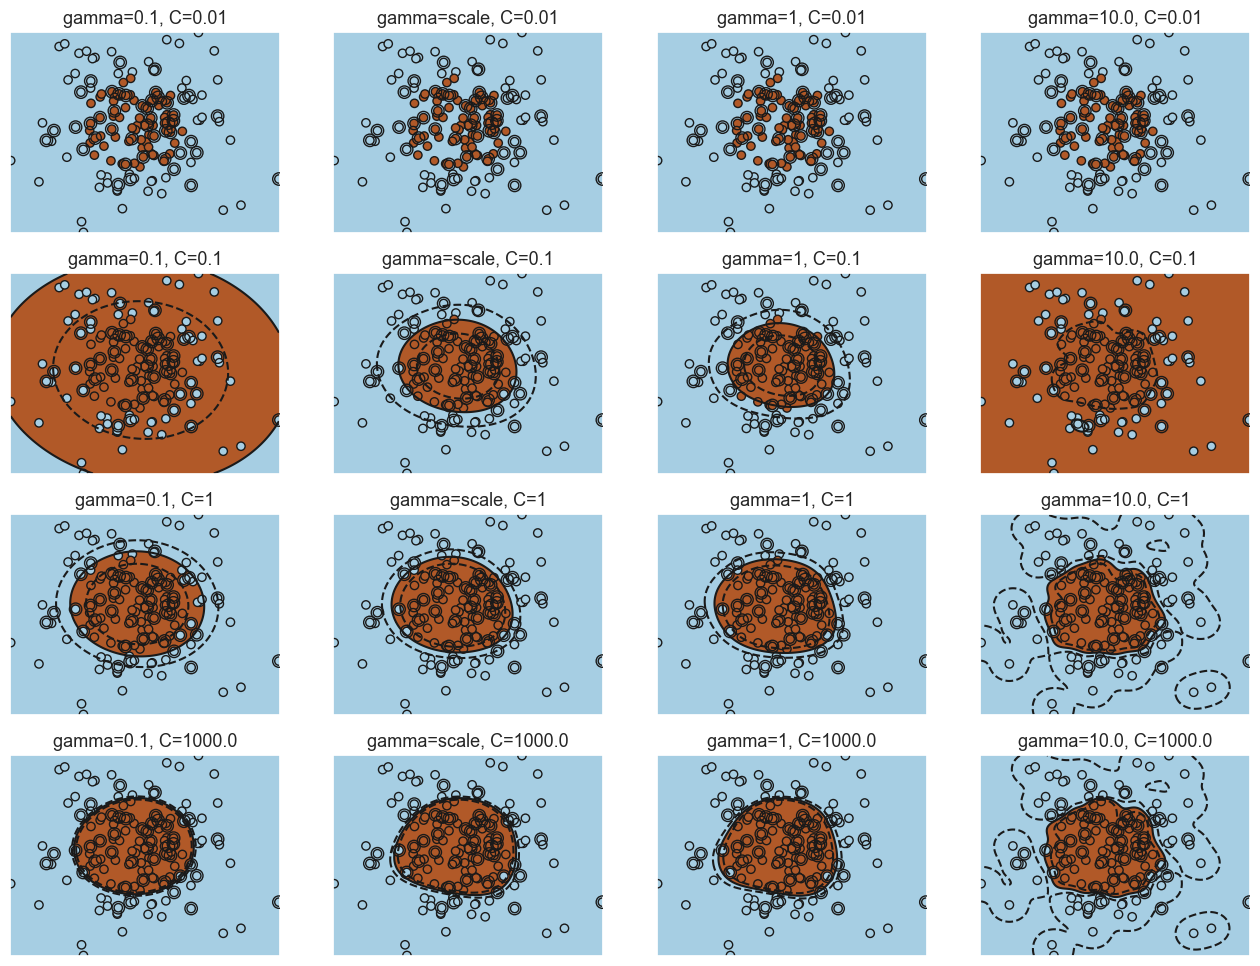

In [9]:
#для rbf: 
# Интуитивно понятно, что параметр gamma определяет, 
# насколько далеко простирается влияние одного обучающего примера, при этом низкие значения означают
# "далеко", а высокие - ‘близко’. Гамма-параметры можно рассматривать как величину, обратную радиусу влияния выборок, 
# выбранных моделью в качестве опорных векторов

#Для больших значений C будет принят меньший запас, если функция принятия решения лучше классифицирует
#все точки обучения правильно. Меньшее значение C будет способствовать большему запасу, следовательно, 
#более простой функции принятия решений, за счет точности обучения.


from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
#поэксперементируем с параметрами gamma, C
#https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
C_2d_range = [1e-2, 1e-1, 1, 1e3]
gamma_2d_range = [1e-1,'scale', 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel = 'rbf', C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
plt.figure(figsize=(16, 12))
# xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title(f"gamma={gamma}, C={C}", size="small")

    # visualize parameter's effect on decision function
    
    #для другой визуализации
#     plt.pcolormesh(XX, YY, -Z, cmap=plt.cm.RdBu)
    plt.pcolormesh(XX, YY, np.sign(Z)/3, cmap=plt.cm.Paired)
#     plt.pcolormesh(XX, YY, -Z/np.max(np.abs(Z)), cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
    
    plt.axis("tight")
    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )
    plt.xticks(())
    plt.yticks(())
    if(C == 0.01):
        print(gamma)
        print(np.max(Z), np.min(Z))
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        predicts = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) 
#         print(x_min,x_max,y_min,y_max)
        print('For C==0.01 there all of predicts is to 1 class' if np.sign(np.max(predicts))==np.sign(np.min(predicts))==1 else 
                 'For C==0.01 there not all of predicts is to 1 class')
#         print(gamma, clf.predict([[-1., -1.]]))
#         print()
        idx_minus_1 = np.where(np.sign(Z) == -1)
        idx_1 = np.where(np.sign(Z) == 1)
        print('indexes where -1', idx_minus_1)
        print('indexes where 1', idx_1)
#         clf.predict([[]])
#         print(type(Z))
    plt.axis("tight")
    


# scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))
print(list(enumerate(classifiers)))

<Axes: xlabel='x', ylabel='y'>

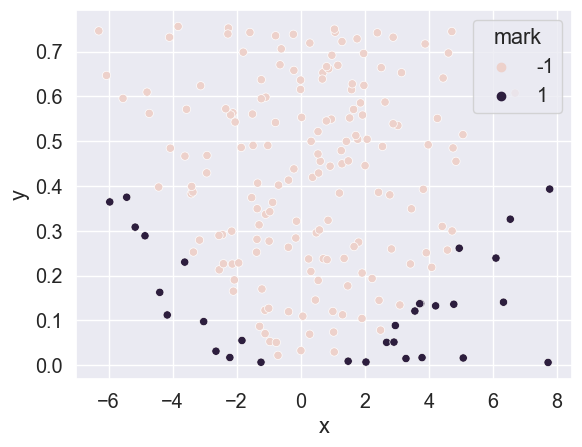

In [10]:
df = pd.read_excel(r'C:\Users\Андрей\Desktop\5 сем\Artificial_intelligence\not_binary_classification\Nonlin_ker_2_2.xlsx', header=None, names= ['x','y','mark'])
df
sns.scatterplot(data=df, x="x", y="y", hue = "mark")

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X_2d = X[:, :2]
# print(X_2d)
X_2d = X_2d[y > 0]

# print(X_2d)
y_2d = y[y > 0]
y_2d -= 1

B = X_train[y_train ==1]
B
len(X_train[y_train ==1]), len(X_train[y_train ==-1]), len(X_train)

(53, 52, 105)

In [12]:
dy_train = clf.decision_function(X_train)
# np.sign(dy_train)-y_train
y_train
(np.sign(dy_train)-y_train != 0).sum()
# len(np.where((np.sign(dy_train)-y_train) != 0))
clf.support_vectors_
A = clf.support_vectors_
B = X_train[y_train == 1]
len([x for x in set(tuple(x) for x in A) & set(tuple(x) for x in B)])
# A

33

{'sv_num': 37,
 'train_num_1': 10,
 'train_num_minus_1': 2,
 'test_num_1': 7,
 'test_num_minus_1': 0}

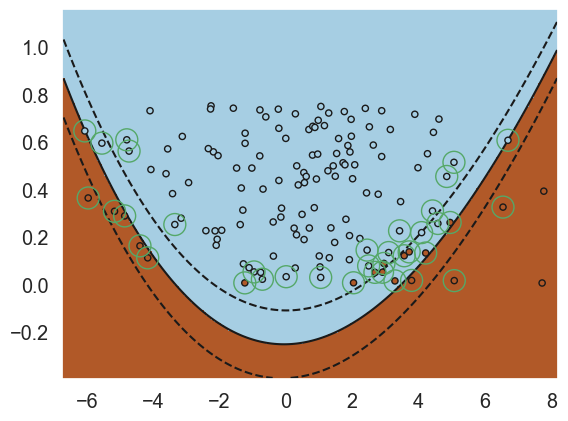

In [13]:
X = df[['x','y']].to_numpy()
y = df[['mark']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
clf = svm.SVC(kernel='poly', degree = 2, gamma='scale', coef0 = 5)
clf.fit(X_train, y_train)
plt.axes()

plt.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
)
# Circle out the test data
#             plt.scatter(
#                 X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
#             )
# Plot bigger circles around samples that serve as support vectors
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=250,
    facecolors="none",zorder=10,
    edgecolors="g",
)
x_min = X[:, 0].min()-0.4
x_max = X[:, 0].max()+0.4
y_min = X[:, 1].min()-0.4
y_max = X[:, 1].max()+0.4

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# print(x_min,x_max,y_min,y_max)
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#рисуем контурные линии соответствующие уровням решающей функции (decision_function) - уровень decision_function = 0; =+-0.5
plt.contour(
XX,
YY,
Z,
colors=["k", "k", "k"],
linestyles=["--", "-", "--"],
levels=[-0.5, 0, 0.5],
)


plt.axis("tight")

def get_statistics(clf, X_train, y_train, X_test, y_test):
    def get_len_intercept(A,B):
        return len([x for x in set(tuple(x) for x in A) & set(tuple(x) for x in B)])
    dy_train = clf.decision_function(X_train)
    dy_test =  clf.decision_function(X_test)
    train_pos_num = (np.sign(dy_train)-y_train != 0).sum() #число неправильно отмеченных точек в тренировочной выборке
    test_pos_num = (np.sign(dy_test)-y_test != 0).sum() #число неправильно отмеченных точек в тестовой выборке
    sv_num = len(clf.support_vectors_) #число опорных векторов
    A = clf.support_vectors_
    B = X_train[y_train == 1]
    C = X_train[y_train == -1]
    sv_num_1 = len([x for x in set(tuple(x) for x in A) & set(tuple(x) for x in B)])
    sv_num_minus_1 = len([x for x in set(tuple(x) for x in A) & set(tuple(x) for x in C)])
    coords_train_pos_num = X_train[np.sign(dy_train)-y_train != 0] #координаты неверно отмеченных точек из тренировочн выборки 
    coords_test_pos_num = X_test[np.sign(dy_test)-y_test != 0]#координаты неверно отмеченных точек из тестовой выборки
    train_pos_num_1 = get_len_intercept((coords_train_pos_num) , (X_train[y_train==1])) #количество точек из обуч, класс 1, классиф непр
    train_pos_num_minus_1 = get_len_intercept((coords_train_pos_num) , (X_train[y_train==-1])) #количество точек из обуч, класс -1, классиф непр
    
    test_pos_num_1 = get_len_intercept((coords_test_pos_num) , (X_test[y_test==1])) #количество точек из тестовой, класс 1, классиф непр
    test_pos_num_minus_1 = get_len_intercept((coords_test_pos_num) , (X_test[y_test==-1])) #количество точек из тестовой, класс 1, классиф непр
    return {'sv_num':sv_num, 'train_num_1':train_pos_num_1, 'train_num_minus_1':train_pos_num_minus_1,
            'test_num_1': test_pos_num_1, 'test_num_minus_1': test_pos_num_minus_1}

get_statistics(clf,X_train,y_train,X_test,y_test)

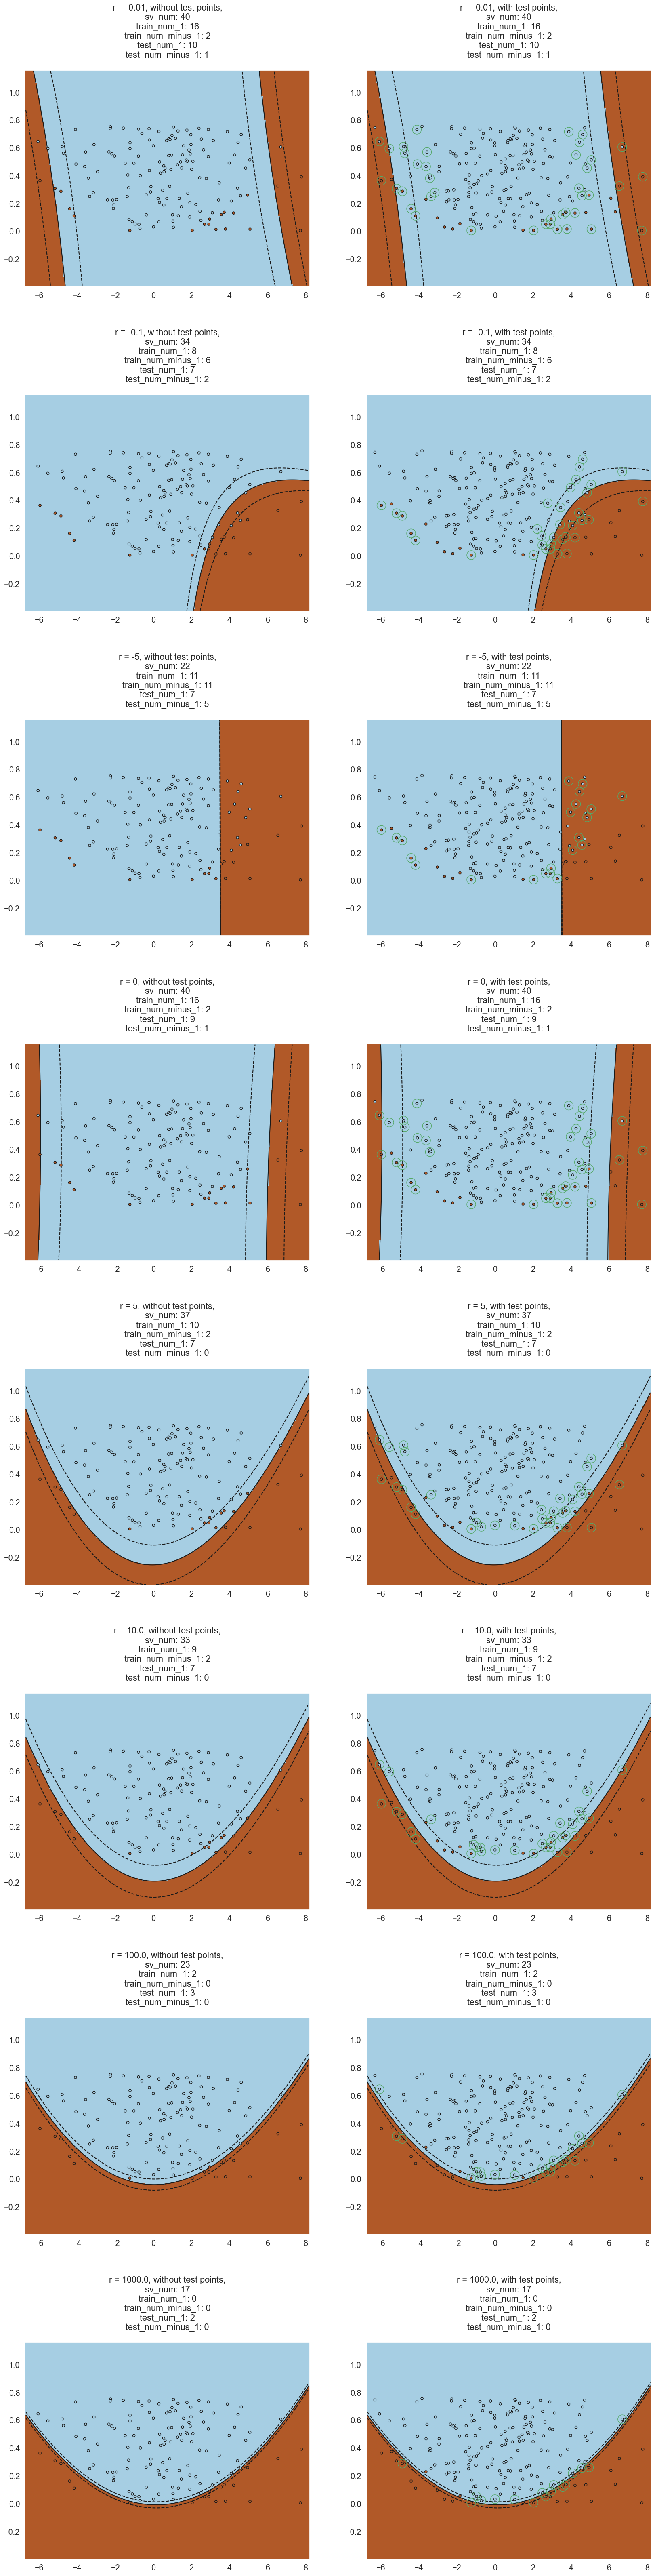

In [14]:
#посмотрим для разных r
X = df[['x','y']].to_numpy()
y = df[['mark']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
rs = [-1e-2,-1e-1,-5,0,5,1e1,1e2,1e3]
# rs = [5]
plt.figure(figsize=(20, 80))

def get_statistics(clf, X_train, y_train, X_test, y_test):
    def get_len_intercept(A,B):
        return len([x for x in set(tuple(x) for x in A) & set(tuple(x) for x in B)])
    dy_train = clf.decision_function(X_train)
    dy_test =  clf.decision_function(X_test)
    train_pos_num = (np.sign(dy_train)-y_train != 0).sum() #число неправильно отмеченных точек в тренировочной выборке
    test_pos_num = (np.sign(dy_test)-y_test != 0).sum() #число неправильно отмеченных точек в тестовой выборке
    sv_num = len(clf.support_vectors_) #число опорных векторов
    A = clf.support_vectors_
    B = X_train[y_train == 1]
    C = X_train[y_train == -1]
    sv_num_1 = len([x for x in set(tuple(x) for x in A) & set(tuple(x) for x in B)])
    sv_num_minus_1 = len([x for x in set(tuple(x) for x in A) & set(tuple(x) for x in C)])
    coords_train_pos_num = X_train[np.sign(dy_train)-y_train != 0] #координаты неверно отмеченных точек из тренировочн выборки 
    coords_test_pos_num = X_test[np.sign(dy_test)-y_test != 0]#координаты неверно отмеченных точек из тестовой выборки
    train_pos_num_1 = get_len_intercept((coords_train_pos_num) , (X_train[y_train==1])) #количество точек из обуч, класс 1, классиф непр
    train_pos_num_minus_1 = get_len_intercept((coords_train_pos_num) , (X_train[y_train==-1])) #количество точек из обуч, класс -1, классиф непр
    
    test_pos_num_1 = get_len_intercept((coords_test_pos_num) , (X_test[y_test==1])) #количество точек из тестовой, класс 1, классиф непр
    test_pos_num_minus_1 = get_len_intercept((coords_test_pos_num) , (X_test[y_test==-1])) #количество точек из тестовой, класс 1, классиф непр
    return {'sv_num':sv_num, 'train_num_1':train_pos_num_1, 'train_num_minus_1':train_pos_num_minus_1,
            'test_num_1': test_pos_num_1, 'test_num_minus_1': test_pos_num_minus_1}
    

for k,r in enumerate(rs):
    
    for iterat in range(2):
        f = plt.subplot(len(rs), 2, (k*2)+iterat+1)
#         print(f)
#         f.set_aspect(1)
        

        clf = svm.SVC(kernel='poly', degree = 2, gamma='scale', coef0 = r)
        clf.fit(X_train, y_train)
        
#         print(clf.support_vectors_[:, 0],
#                 clf.support_vectors_[:, 1])
        statistic = get_statistics(clf,X_train,y_train,X_test,y_test)
#         keys = statistic.keys()
        log = ''.join([f"{k}: {v}\n" for k,v in statistic.items()])
        if iterat==0:
            plt.title(f"r = {r}, without test points,\n" + log)
            
            plt.scatter(
                    X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
                )
        else:
            plt.title(f"r = {r}, with test points,\n" + log)
            plt.scatter(
                    X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
                )
            # Circle out the test data
#             plt.scatter(
#                 X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
#             )
            # Plot bigger circles around samples that serve as support vectors
            plt.scatter(
                clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=250,
                facecolors="none",zorder=10,
                edgecolors="g",
            )
        x_min = X[:, 0].min()-0.4
        x_max = X[:, 0].max()+0.4
        y_min = X[:, 1].min()-0.4
        y_max = X[:, 1].max()+0.4

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        # print(x_min,x_max,y_min,y_max)
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #рисуем контурные линии соответствующие уровням решающей функции (decision_function) - уровень decision_function = 0; =+-0.5
        plt.contour(
            XX,
            YY,
            Z,
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
            levels=[-0.5, 0, 0.5],
        )
#         plt.plot(label = get_statistics(clf,X_train,y_train,X_test,y_test))
#         plt.legend(get_statistics(clf,X_train,y_train,X_test,y_test))
        plt.axis("tight")
plt.subplots_adjust(hspace = .5 )
plt.show()

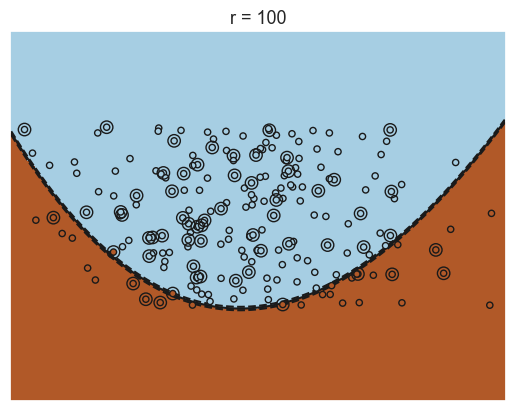

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
#самое лучшее значение при r = 100
clf = svm.SVC(kernel='poly', gamma='scale', coef0 = 100)

clf.fit(X_train, y_train)
plt.title(f"r = {100}", size="small")
plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )
# Circle out the test data
plt.scatter(
    X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
)
x_min = X[:, 0].min()-0.4
x_max = X[:, 0].max()+0.4
y_min = X[:, 1].min()-0.4
y_max = X[:, 1].max()+0.4

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# print(x_min,x_max,y_min,y_max)
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#рисуем контурные линии соответствующие уровням решающей функции (decision_function) - уровень decision_function = 0; =+-0.5
plt.contour(
    XX,
    YY,
    Z,
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
    levels=[-0.5, 0, 0.5],
)

plt.xticks(())
plt.yticks(())
plt.axis("tight")

plt.show()


(array([3.68096877]), array([3.68096877]))

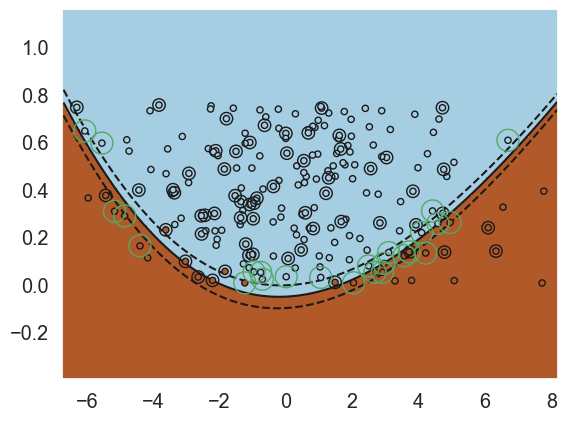

In [16]:
def a_poly(lambds, Points, x, intercept, degree=2,coef0=5, gamma = 1):
    def K_poly(xi,x):
        return (gamma*np.dot(x,xi)+coef0)**degree
    result = 0
    for i in range(len(Points)):
        result+=(lambds[i]*K_poly(x,Points[i]))
#         print(result)
    result+=intercept
#     print(result)
    return result

X = df[['x','y']].to_numpy()
y = df[['mark']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
clf = svm.SVC(kernel='poly', degree = 2, gamma=1, coef0 = 5)
clf.fit(X_train, y_train)
plt.axes()

plt.scatter(
    X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
)
# Circle out the test data
plt.scatter(
    X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
)
# Plot bigger circles around samples that serve as support vectors
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=250,
    facecolors="none",zorder=10,
    edgecolors="g",
)
x_min = X[:, 0].min()-0.4
x_max = X[:, 0].max()+0.4
y_min = X[:, 1].min()-0.4
y_max = X[:, 1].max()+0.4

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# print(x_min,x_max,y_min,y_max)
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#рисуем контурные линии соответствующие уровням решающей функции (decision_function) - уровень decision_function = 0; =+-0.5
plt.contour(
XX,
YY,
Z,
colors=["k", "k", "k"],
linestyles=["--", "-", "--"],
levels=[-0.5, 0, 0.5],
)


plt.axis("tight")
get_statistics(clf,X_train,y_train,X_test,y_test)


#пример точки для которой определяем класс нашей функцией
clf.decision_function([[-4.,-0.2]]),a_poly(clf.dual_coef_[0], clf.support_vectors_,[-4.,-0.2],clf.intercept_)